In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [12]:
import csv
from datetime import datetime

In [17]:
age_path = "/content/drive/MyDrive/project_facebook_bigdata/fresh_data_clean/user_age.csv"
gender_path = "/content/drive/MyDrive/project_facebook_bigdata/fresh_data_clean/user_gender.csv"
location_path = "/content/drive/MyDrive/project_facebook_bigdata/fresh_data_clean/user_location.csv"


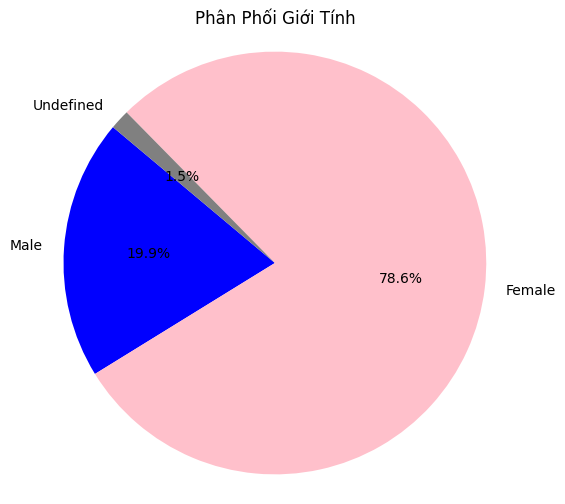

In [26]:

# Mở tệp CSV và đọc nội dung
gender_list = []
with open(gender_path, 'r', encoding='utf-8') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        # Trích xuất giá trị giới tính từ mỗi hàng và kiểm tra
        gender = row['gender']
        if gender == 'male' or gender == 'female':
            gender_list.append(gender)
        else:
            gender_list.append('Không xác định')



total_gender_count = len(gender_list)
male_count = gender_list.count('male')
female_count = gender_list.count('female')
undefined_count = gender_list.count('Không xác định')

import matplotlib.pyplot as plt

# Dữ liệu về phân phối giới tính
gender_labels = ['Male', 'Female', 'Undefined']
gender_counts = [male_count, female_count, undefined_count]

# Màu sắc cho các phần trong biểu đồ
colors = ['blue', 'pink', 'gray']

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Phân Phối Giới Tính')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()


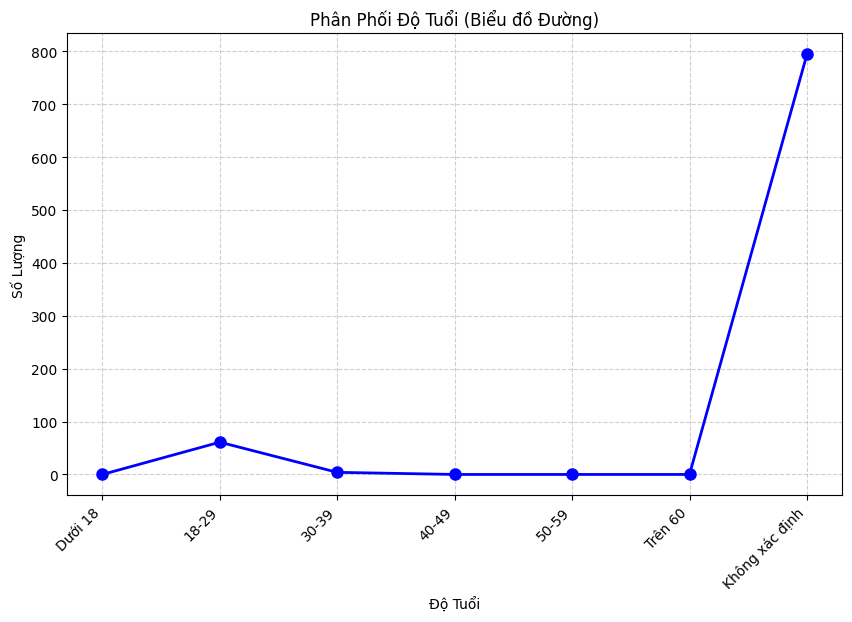

In [30]:

age_list = []

# Mở tệp CSV và đọc nội dung
with open(age_path, 'r', encoding='utf-8') as csv_file:
    csv_reader = csv.DictReader(csv_file)  # Sử dụng DictReader để đọc dữ liệu dưới dạng từ điển
    for row in csv_reader:
        age = row.get("age")  # Trường "age" trong mỗi hàng
        if age:  # Kiểm tra xem trường "age" có giá trị không
            age_list.append(age)

# Chia vùng tuổi
under_18_count = 0
age_18_to_29_count = 0
age_30_to_39_count = 0
age_40_to_49_count = 0
age_50_to_59_count = 0
over_60_count = 0
undefined_count = 0

for age_str in age_list:
    try:
        age = int(age_str)  # Chuyển đổi thành số nguyên
        if age < 18:
            under_18_count += 1
        elif 18 <= age < 30:
            age_18_to_29_count += 1
        elif 30 <= age < 40:
            age_30_to_39_count += 1
        elif 40 <= age < 50:
            age_40_to_49_count += 1
        elif 50 <= age < 60:
            age_50_to_59_count += 1
        else:
            over_60_count += 1
    except ValueError:
        undefined_count += 1


import matplotlib.pyplot as plt

# Dữ liệu về phân phối độ tuổi
age_labels = ['Dưới 18', '18-29', '30-39', '40-49', '50-59', 'Trên 60', 'Không xác định']
age_counts = [under_18_count, age_18_to_29_count, age_30_to_39_count, age_40_to_49_count, age_50_to_59_count, over_60_count, undefined_count]

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(age_labels, age_counts, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
plt.xlabel('Độ Tuổi')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Độ Tuổi (Biểu đồ Đường)')
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để dễ đọc
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()




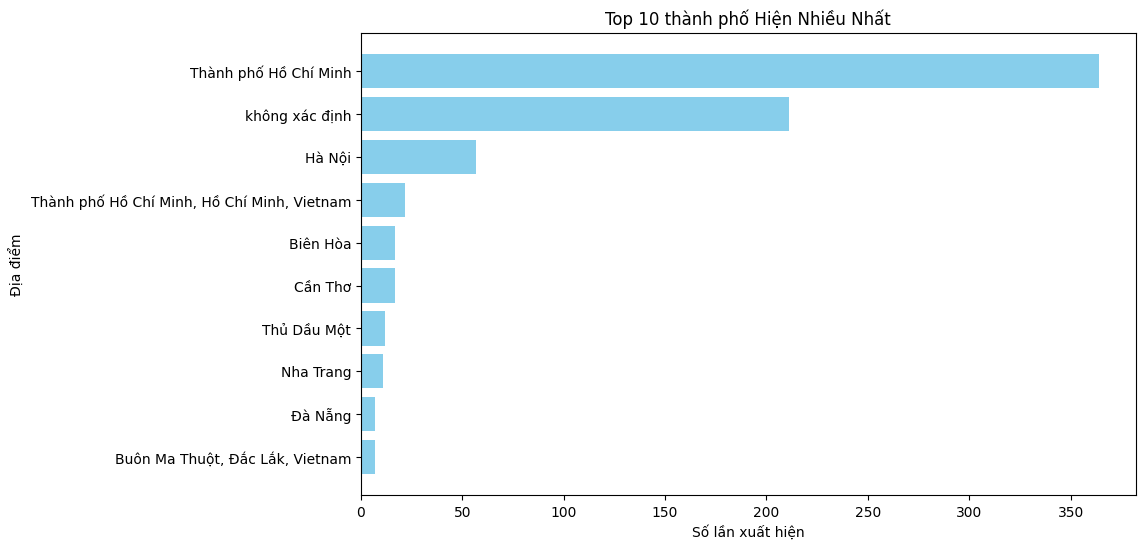

In [24]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

# Đường dẫn tới tệp CSV
csv_file_path = "/content/drive/MyDrive/project_facebook_bigdata/fresh_data_clean/user_location.csv"

# Tạo một từ điển để lưu trữ số lần xuất hiện của từng tên
name_count = defaultdict(int)

# Mở tệp CSV và đọc nội dung
with open(csv_file_path, 'r', encoding='utf-8') as csv_file:
    csv_reader = csv.DictReader(csv_file)  # Sử dụng DictReader để đọc dữ liệu dưới dạng từ điển
    for row in csv_reader:
        name = row.get("Tên")  # Trường "Tên" trong mỗi hàng
        if name:  # Kiểm tra xem trường "Tên" có giá trị không
            name_count[name] += 1

# Sắp xếp theo số lần xuất hiện giảm dần và lấy top 10
sorted_name_count = dict(sorted(name_count.items(), key=lambda item: item[1], reverse=True)[:10])

# Tách tên và số lần xuất hiện
names = list(sorted_name_count.keys())
counts = list(sorted_name_count.values())

# Biểu diễn dưới dạng biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(names, counts, color='skyblue')
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Địa điểm')
plt.title('Top 10 thành phố Hiện Nhiều Nhất')
plt.gca().invert_yaxis()  # Đảo ngược trục y để tên xuất hiện nhiều nhất ở đầu
plt.show()
